# Example

In [1]:
# import libraries
import gym

import numpy as np

np.random.seed(10)

In [2]:
# creating environment
env = gym.make('gym_trading:trading-v0',
               n_samples=200,
               sampling_every=16,
               random_initial_date=False,
               stack_size=10,
               fee=0.25,
               reward_function='AAV',
               endurance_mode=False,
               normalize_observation=True)

print('Number of actions:', env.action_space.n)

Number of actions: 6


In [3]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')
print(observation.shape)

Observation: [[1.099990e+04 2.468000e-01 3.186500e+02]
 [1.103760e+04 2.438400e-01 3.185900e+02]
 [1.106980e+04 2.445450e-01 3.248950e+02]
 [1.113815e+04 2.458300e-01 3.357400e+02]
 [1.104130e+04 2.462400e-01 3.331200e+02]
 [1.107340e+04 2.458900e-01 3.328600e+02]
 [1.115130e+04 2.461800e-01 3.378300e+02]
 [1.117960e+04 2.484950e-01 3.427050e+02]
 [1.131330e+04 2.520600e-01 3.432700e+02]
 [1.135715e+04 2.598400e-01 3.470500e+02]] (type: <class 'numpy.ndarray'>)
(10, 3)


In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
action = 1
while not done:

    # random action 0 (BUY_BTC),  1 (SELL_BTC), 2 (BUY_XRP), 3 (SELL_XRP), 4 (BUY_ETH), 5 (SELL_ETH)
    if counter % 3 == 0 and counter != 0:
        action = np.random.randint(0, 6)
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} - '
              f'Reward (AAV): {reward} - '
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 - Reward (AAV): 0 - Done: False - Price: [[ 1.3889188  -0.73918873 -0.6778086 ]
 [ 1.3951273  -0.7391886  -0.67659295]
 [ 1.4083059  -0.7391884  -0.6745019 ]
 [ 1.3896322  -0.7391883  -0.6750071 ]
 [ 1.3958216  -0.7391884  -0.6750572 ]
 [ 1.4108412  -0.7391883  -0.6740989 ]
 [ 1.4162978  -0.73918784 -0.67315894]
 [ 1.4420764  -0.7391872  -0.67305005]
 [ 1.4505312  -0.7391857  -0.6723212 ]
 [ 1.4385288  -0.7391858  -0.6726037 ]] (type: <class 'numpy.ndarray'>)
Total profit: 1.44 %


/home/damiano/PycharmProjects/gym-trading/gym_trading/envs/TradingGame.py:249: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


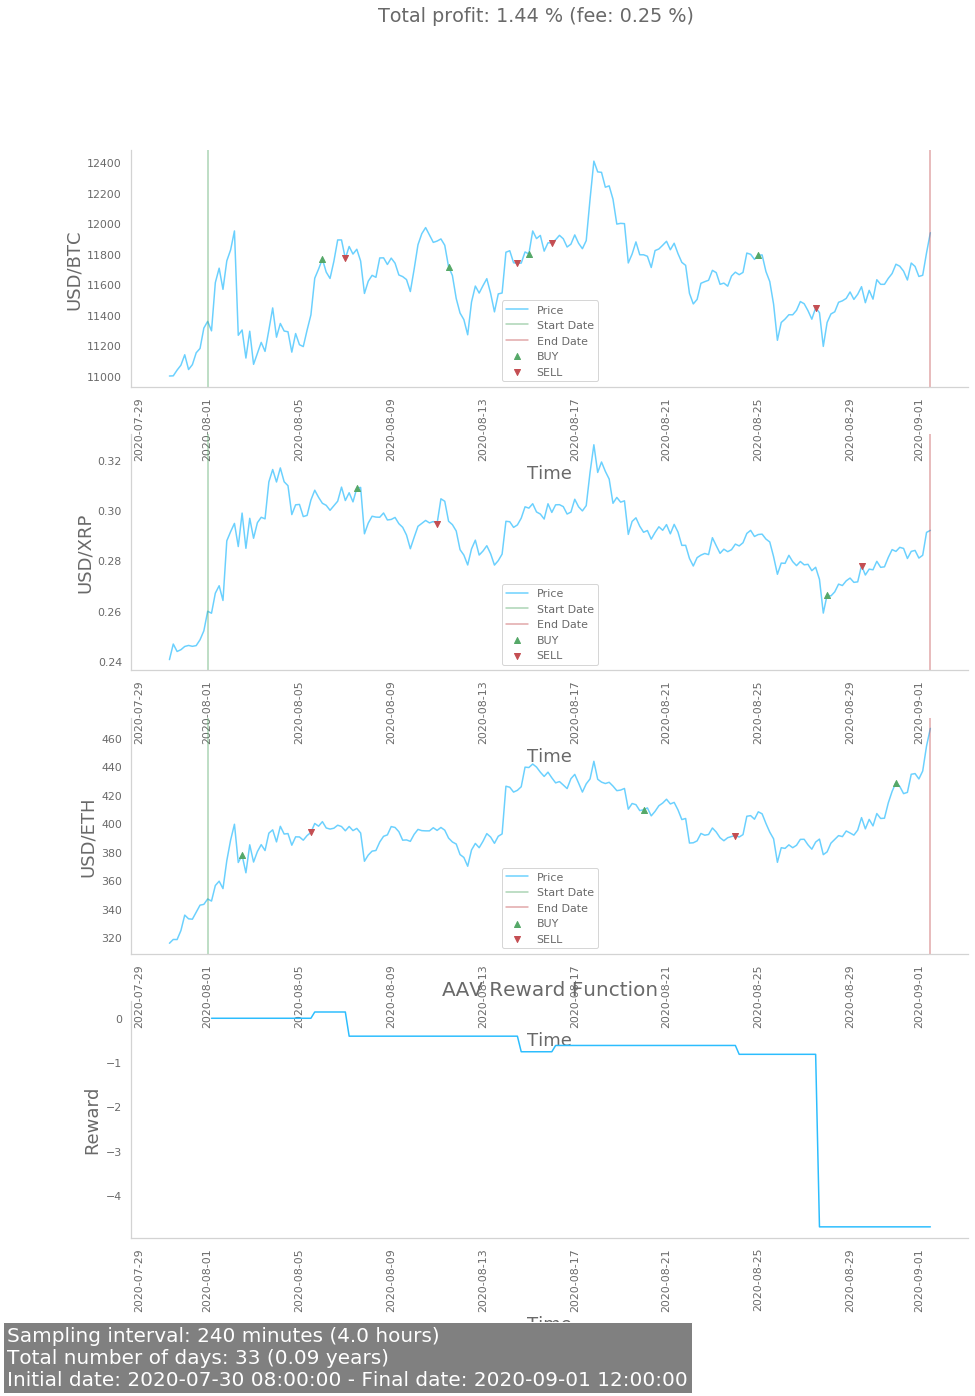

In [5]:
env.render()